<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


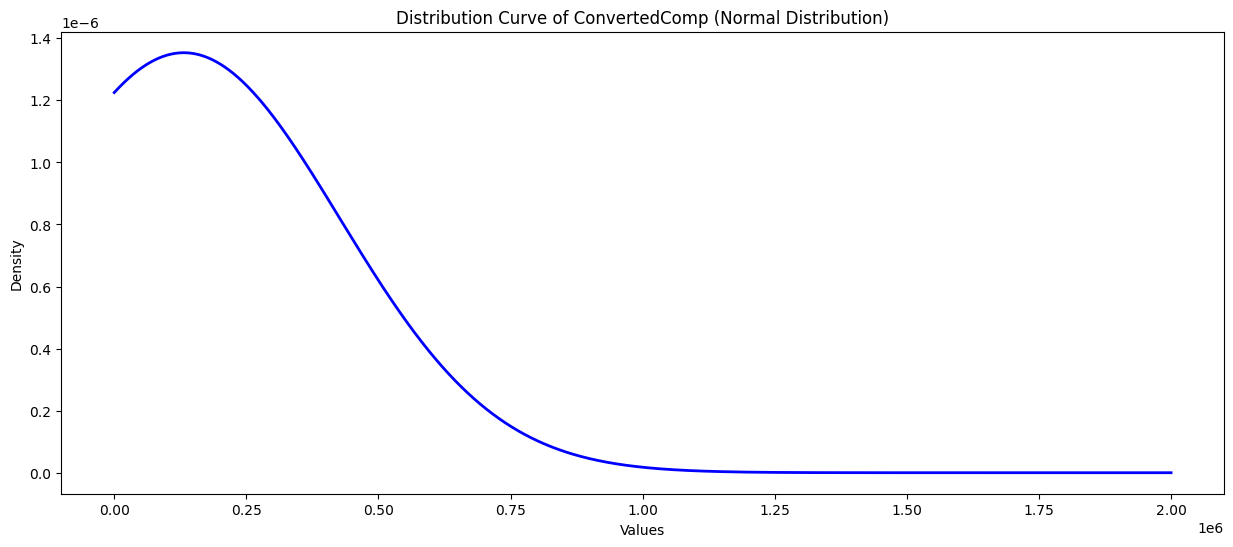

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Replace 'your_column' with the actual column name
column_data = df['ConvertedComp'].dropna()  # Drop NaN values for accurate plotting

# Fit the data to a normal distribution: Calculate the mean and standard deviation
mean = np.mean(column_data)
std_dev = np.std(column_data)

# Create a range of x values
x_vals = np.linspace(column_data.min(), column_data.max(), 1000)

# Calculate the probability density function (PDF) for a normal distribution
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mean) / std_dev) ** 2)

# Plot the distribution curve (normal distribution)
plt.figure(figsize=(15, 6))
plt.plot(x_vals, pdf, color='blue', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(f'Distribution Curve of {column_data.name} (Normal Distribution)')
plt.show()



Plot the histogram for the column `ConvertedComp`.


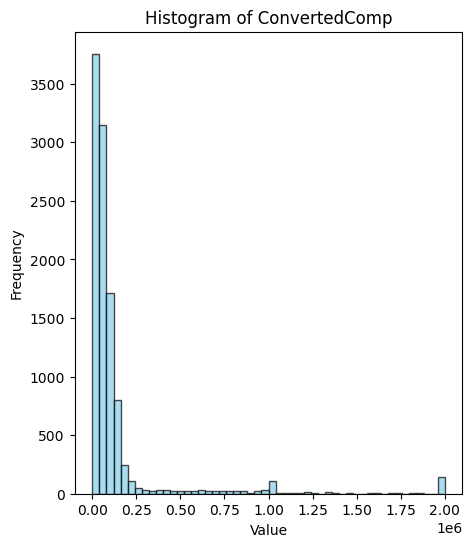

In [28]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt


column_data = df['ConvertedComp'].dropna()  # Replace with your column name

# Plot the histogram
plt.figure(figsize=(5, 6))
plt.hist(column_data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_data.name}')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [27]:
# your code goes here
median_value = column_data.median()
print(median_value)

57745.0


How many responders identified themselves only as a **Man**?


In [36]:
man_count = (df['ConvertedComp'] == 'Man').sum()
print(man_count)

0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [37]:
# your code goes here
man_count = (df['ConvertedComp'] == 'Woman').sum()
print(man_count)

0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [38]:
# your code goes here
age_summary = df['Age'].describe()
print(age_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


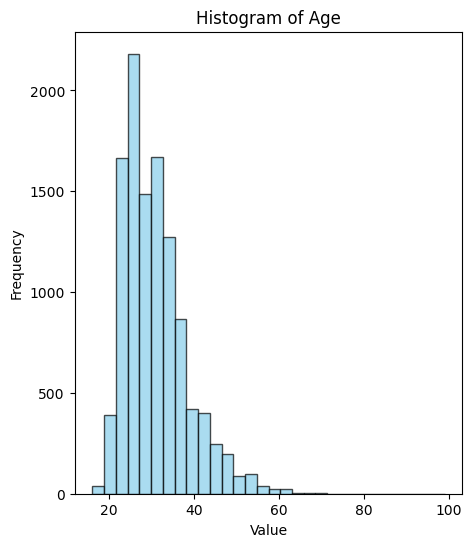

In [39]:
# your code goes here
column_data_age = df['Age'].dropna()  # Replace with your column name

# Plot the histogram
plt.figure(figsize=(5, 6))
plt.hist(column_data_age, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_data_age.name}')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


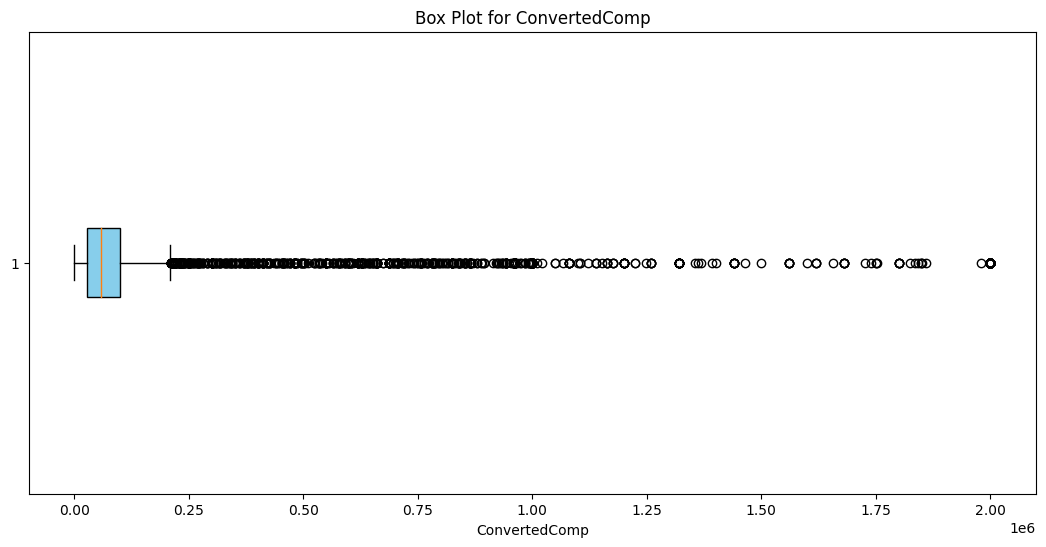

In [43]:
# your code goes here
# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(13, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Box Plot for ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [44]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

print(IQR)

73132.0


Find out the upper and lower bounds.


In [48]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower: {lower_bound}, upper: {upper_bound}')

lower: -82830.0, upper: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [49]:
# your code goes here
outliers_count = df[~df['ConvertedComp'].between(lower_bound, upper_bound)].shape[0]

# Print the number of outliers
print(f"Number of outliers: {outliers_count}")


Number of outliers: 1695


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [50]:
# your code goes here
df_no_outliers = df[df['ConvertedComp'].between(lower_bound, upper_bound)]

# Print the new dataframe without outliers
print(df_no_outliers)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [52]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for only numerical columns
correlation_matrix = numeric_df.corr()

# Extract the correlation values between 'Age' and all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation between 'Age' and other numerical columns
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
